# WM-07: Cartesian multipole vector potential

In [1]:
(* Vector potential and magnetic field (single multipole) *)
(* Note, this formulars do not use MAD-X factorial convension *)

ClearAll[multipole$straight] ;
multipole$straight[
    order_Integer,              (* -- multipole order            (integer) *)
    kn_,                        (* -- normal amplitude           (symbol or number) *)
    ks_                         (* -- skew amplitude             (symbol or number) *)
] := Block[
    {qx, qy, qz, kn$local, ks$local, potential},
    potential = Collect[ComplexExpand[1/order*Re[(kn$local + I*ks$local)*(qx + I*qy)^order]], {kn$local, ks$local}, Expand] ;
    {0, 0, -potential} /. {kn$local -> kn, ks$local -> ks}
] /; order > 0 ;


ClearAll[multipole$straight$field] ;
multipole$straight$field[
    order_Integer,
    kn_,
    ks_
] := Block[
    {qx, qy, qz, ax, ay, az, bx, by, bz},
    {ax, ay, az} = multipole$straight[order, kn$local, ks$local] ;
    {bx, by, bz} = Curl[{ax, ay, az}, {qx, qy, qz}] ;
    Collect[{bx, by, bz}, {kn$local, ks$local}, Expand] /. {kn$local -> kn, ks$local -> ks}
] /; order > 0 ;

In [7]:
(* Dipole *)

order = 1 ;
{ax, ay, az} = multipole$straight[order, kn, ks] 

Simplify[Laplacian[az, {qx, qy, qz}, "Cartesian"]]
Simplify[Div[Curl[{ax, ay, az}, {qx, qy, qz}], {qx, qy, qz}]]

{bx, by, bz} = multipole$straight$field[order, kn, ks] 
Simplify[Div[{bx, by, bz}, {qx, qy, qz}, "Cartesian"]]

by /. qy -> 0
bx /. qy -> 0

{0, 0, -(kn qx) + ks qy}
0
0
{ks, kn, 0}
0
kn
ks

2     2
                      qx    qy
{0, 0, ks qx qy - kn (--- - ---)}
                       2     2
0
0
{ks qx + kn qy, kn qx - ks qy, 0}
0
kn qx
ks qx
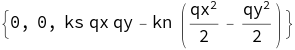

In [16]:
(* Quadrupole *)

order = 2 ;
{ax, ay, az} = multipole$straight[order, kn, ks] 

Simplify[Laplacian[az, {qx, qy, qz}, "Cartesian"]]
Simplify[Div[Curl[{ax, ay, az}, {qx, qy, qz}], {qx, qy, qz}]]

{bx, by, bz} = multipole$straight$field[order, kn, ks] 
Simplify[Div[{bx, by, bz}, {qx, qy, qz}, "Cartesian"]]

by /. qy -> 0
bx /. qy -> 0

3                                3
             qx         2             2       qy
{0, 0, -(kn (--- - qx qy )) - ks (-(qx  qy) + ---)}
              3                                3
0
0
                    2     2                       2     2
{2 kn qx qy + ks (qx  - qy ), -2 ks qx qy + kn (qx  - qy ), 0}
0
     2
kn qx
     2
ks qx
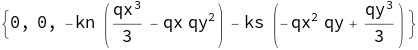

In [25]:
(* Sextupole *)

order = 3 ;
{ax, ay, az} = multipole$straight[order, kn, ks] 

Simplify[Laplacian[az, {qx, qy, qz}, "Cartesian"]]
Simplify[Div[Curl[{ax, ay, az}, {qx, qy, qz}], {qx, qy, qz}]]

{bx, by, bz} = multipole$straight$field[order, kn, ks] 
Simplify[Div[{bx, by, bz}, {qx, qy, qz}, "Cartesian"]]

by /. qy -> 0
bx /. qy -> 0

4       2   2     4
                 3            3         qx    3 qx  qy    qy
{0, 0, -(ks (-(qx  qy) + qx qy )) - kn (--- - --------- + ---)}
                                         4        2        4
0
0
       3          2            2        3         3          2             2        3
{ks (qx  - 3 qx qy ) + kn (3 qx  qy - qy ), kn (qx  - 3 qx qy ) + ks (-3 qx  qy + qy ), 
 
>   0}
0
     3
kn qx
     3
ks qx
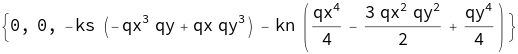

In [34]:
(* Octupole *)

order = 4 ;
{ax, ay, az} = multipole$straight[order, kn, ks] 

Simplify[Laplacian[az, {qx, qy, qz}, "Cartesian"]]
Simplify[Div[Curl[{ax, ay, az}, {qx, qy, qz}], {qx, qy, qz}]]

{bx, by, bz} = multipole$straight$field[order, kn, ks] 
Simplify[Div[{bx, by, bz}, {qx, qy, qz}, "Cartesian"]]

by /. qy -> 0
bx /. qy -> 0